## Observations and Insights

## Dependencies and starter code

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#mouse_metadata.columns
#study_results.columns
# Combine the data into a single dataset
pyma_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")

pyma_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_group = pyma_data.groupby("Drug Regimen")
#regimen_group.head()
#summary elements
#chain to turn into dataframe
#round values to 2 decimals
regimen_mean = pd.DataFrame(regimen_group["Tumor Volume (mm3)"].mean())
regimen_mean = round(regimen_mean.rename(columns ={"Tumor Volume (mm3)":"Mean"}),2)

regimen_median = pd.DataFrame(regimen_group["Tumor Volume (mm3)"].median())
regimen_median = round(regimen_median.rename(columns={"Tumor Volume (mm3)":"Median"}),2)


regimen_var = pd.DataFrame(regimen_group["Tumor Volume (mm3)"].var())
regimen_var = round(regimen_var.rename(columns={"Tumor Volume (mm3)":"Variance"}),2)

regimen_std = pd.DataFrame(regimen_group["Tumor Volume (mm3)"].std())
regimen_std = round(regimen_std.rename(columns={"Tumor Volume (mm3)":"Standard Deviation"}),2)

regimen_sem = pd.DataFrame(regimen_group["Tumor Volume (mm3)"].sem())
regimen_sem = round(regimen_sem.rename(columns={"Tumor Volume (mm3)":"SEM"}),2)
                    


#Turn into dataframe
#regimen_mean_df = pd.DataFrame(regimen_mean)
#regimen_median_df = pd.DataFrame(regimen_median)

regimen_summary = pd.merge(regimen_mean,regimen_median,on="Drug Regimen")
regimen_summary2 = pd.merge(regimen_summary,regimen_var,on="Drug Regimen")
regimen_summary3 = pd.merge(regimen_summary2,regimen_std, on="Drug Regimen")
regimen_summary4 = pd.merge(regimen_summary3, regimen_sem, on="Drug Regimen")
regimen_summary4

regimen_summary4


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

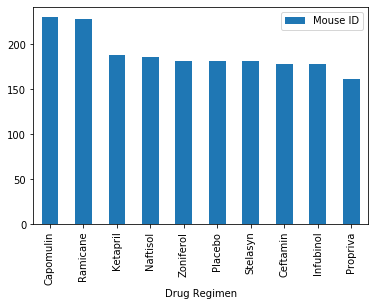

In [57]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#Datapoints based on # of mouse trials per regimen

mouseid_df = pd.DataFrame(regimen_group["Mouse ID"].count())

mouseid_df = (mouseid_df.sort_values("Mouse ID", ascending =False))
mouseid_df.plot.bar()


([<matplotlib.axis.XTick at 0x1a25ea1f208>,
 <a list of 10 Text xticklabel objects>)

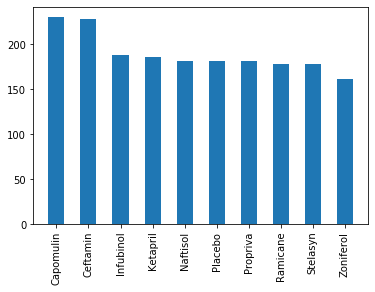

In [58]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#plt.plot()

x_values = mouseid_df.index.values
y_values = mouseid_df["Mouse ID"]

labels = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn","Zoniferol"]

plt.bar(x_values,y_values, width =0.5)
plt.xticks(x_values, labels, rotation ="vertical")

## Pie plots

Male      125
Female    124
Name: Sex, dtype: int64


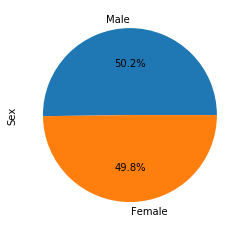

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender = pyma_data[["Mouse ID","Sex"]]
#remove duplicate trials
mouse_gender = mouse_gender.drop_duplicates(subset ="Mouse ID", keep = "first") 
#based on excel, should be about 249 different mouse id
#separate male and female gender
mouse_gender = mouse_gender["Sex"].value_counts()
print(mouse_gender)


type(mouse_gender)

mouse_gender.plot.pie(autopct = '%1.1f%%')
#print(pandas_pie_plt)





Text(0, 0.5, 'Sex')

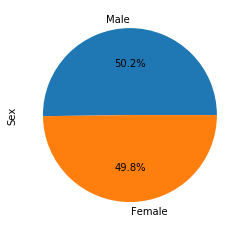

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


gender_label = ["Male", "Female"]
plt.pie(mouse_gender, labels = gender_label,autopct = '%1.1f%%')
#plt.title("Sex", loc = "left", rotation = "vertical")
plt.ylabel("Sex")

## Quartiles, outliers and boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
maxtumor_data = pyma_data.groupby(["Mouse ID"]).max()
maxtumor_data = maxtumor_data.reset_index()
maxtumor_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [62]:
# Determine tumor volume of max(timepoint for mice treated by specific drug

capomilin = maxtumor_data.loc[maxtumor_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
infubinol = maxtumor_data.loc[maxtumor_data["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
placebo = maxtumor_data.loc[maxtumor_data["Drug Regimen"] == "Placebo"]["Tumor Volume (mm3)"]
ceftamin = maxtumor_data.loc[maxtumor_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
stelasyn = maxtumor_data.loc[maxtumor_data["Drug Regimen"] == "Stelasyn"]["Tumor Volume (mm3)"]

#sort values of tumor volume of each drug
capomilin = capomilin.sort_values()
infubinol = infubinol.sort_values()
placebo = placebo.sort_values()
ceftamin = ceftamin.sort_values()
stelasyn = stelasyn.sort_values()

#turn series into dataframe
#capomilin = capomilin.to_frame()


#quantitavely determine outliers for capomilin
capo_quartiles = capomilin.quantile([0.25,0.5,0.75])
capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq - capo_lowerq

capo_lowerbound = capo_lowerq - (1.5*capo_iqr)
capo_upperbound = capo_upperq + (1.5*capo_iqr)

#quantitavely determine outliers for infubinol
inf_quartiles = infubinol.quantile([0.25,0.5,0.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq

inf_lowerbound = inf_lowerq - (1.5*inf_iqr)
inf_upperbound = inf_upperq + (1.5*inf_iqr)


# # #quantitavely determine outliers for placebo
# plac_quartiles = placebo.quantile([0.25,0.5,0.75])
# plac_lowerq = plac_quartiles[0.25]
# plac_upperq = plac_quartiles[0.75]
# plac_iqr = plac_upperq - plac_lowerq
# plac_lowerbound = plac_lowerq - (1.5*plac_iqr)
# plac_upperbound = plac_upperq + (1.5*plac_iqr)

# #quantitavely determine outliers for ceftamin
cef_quartiles = ceftamin.quantile([0.25,0.5,0.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq - cef_lowerq

cef_lowerbound = cef_lowerq - (1.5*cef_iqr)
cef_upperbound = cef_upperq + (1.5*cef_iqr)

# #quantitavely determine outliers for stelasyn
ste_quartiles = stelasyn.quantile([0.25,0.5,0.75])
ste_lowerq = ste_quartiles[0.25]
ste_upperq = ste_quartiles[0.75]
ste_iqr = ste_upperq - ste_lowerq

ste_lowerbound = ste_lowerq - (1.5*ste_iqr)
ste_upperbound = ste_upperq + (1.5*ste_iqr)

print(f'Capolin IQR is {capo_iqr}, Values below {capo_lowerbound} and above {capo_upperbound} could be outliers.')
print(f'Infubinol IQR is {inf_iqr}, Values below {inf_lowerbound} and above {inf_upperbound} could be outliers.')
# print(f'Placebo IQR is {plac_iqr}, Values below {plac_lowerbound} and above {plac_upperbound} could be outliers.')
print(f'Ceftamin IQR is {cef_iqr}, Values below {cef_lowerbound} and above {cef_upperbound} could be outliers.')
print(f'Stelasyn IQR is {ste_iqr}, Values below {ste_lowerbound} and above {ste_upperbound} could be outliers.')



Capolin IQR is 1.7490055199999972, Values below 42.376491720000004 and above 49.37251379999999 could be outliers.
Infubinol IQR is 11.477135160000003, Values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin IQR is 15.577752179999997, Values below 25.355449580000002 and above 87.66645829999999 could be outliers.
Stelasyn IQR is 16.62734878500001, Values below 27.53557243999998 and above 94.04496758000002 could be outliers.


Text(0, 0.5, 'Final Tumor Volume (mm3)')

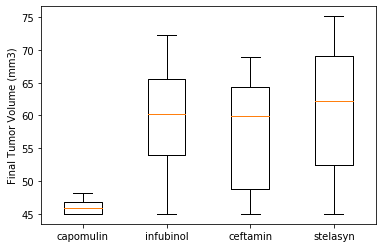

In [63]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot([capomilin,infubinol,ceftamin,stelasyn], labels = ["capomulin","infubinol","ceftamin","stelasyn"])
plt.ylabel("Final Tumor Volume (mm3)")

## Line and scatter plots

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0  


Text(0.5, 1.0, "Tumor Volume over Time for Mouse 's185' on Capomilin")

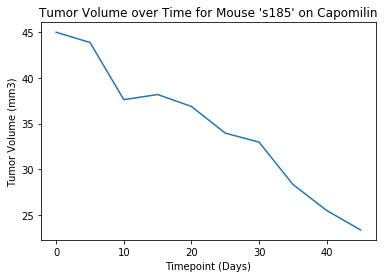

In [112]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = pyma_data.loc[pyma_data["Drug Regimen"]== "Capomulin"]
print(capomulin_table.head())
#find time point data for mouse id s185
mouse_capo = capomulin_table.loc[capomulin_table["Mouse ID"]=="s185"]


# capo_mouse_y = mouse_capo["Timepoint"]
# capo_mouse_x = mouse_capo["Tumor Volume (mm3)"]
# capo_line_df =pd.DataFrame({"Tumor Volume (mm3)":capo_mouse_x,"Timepoint":capo_mouse_y, })
# capo_line_df.plot.line()
#plot.line(capo_mouse_x,capo_mouse_y)

plt.plot(mouse_capo["Timepoint"],mouse_capo["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume over Time for Mouse 's185' on Capomilin")


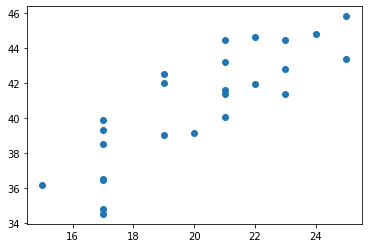

In [136]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#print(capomulin_table)
#avg_mouse = mouse_capo.groupby(["Mouse ID"]).mean()
avg_capo_df = capomulin_table.groupby(["Mouse ID"]).mean()

plt.scatter(avg_capo_df["Weight (g)"],avg_capo_df["Tumor Volume (mm3)"])



In [66]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen